# **Phase 1: Data Preparation & Visualization**

**Team 03:**

- Bruno Fernandes, up202108871
- Hugo Abelheira, up202409899
- Luís Pereira, up200502498

## **Table of Contents**

* [Introduction](#intro)
    * [Dataset Source](#dataset_source)
    * [Dataset Description](#dataset_description)
* [Data Preparation](#data_prep)
* [Data Visualization](#data_viz)

## **Introduction** <a class="anchor" id="intro"></a>

### **Dataset Source** <a class="anchor" id="dataset_source"></a>

The dataset used in this project can be found here: [ICNF](https://www.icnf.pt/florestas/gfr/gfrgestaoinformacao/estatisticas). It contains information about the wildfires in Portugal from 2001 to 2023.

### **Dataset Description** <a class="anchor" id="dataset_description"></a>

The dataset contains details about the wildfires in Portugal, such as the district, municipality, date, cause, burned area, duration and more. It is divided into 3 sheets: `Estatisticas_Portugal_Continent`, `Estatisticas_Distrito` and `Estatisticas_Concelho`.


### **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_file = 'datasets/Registos_Incendios_SGIF_2011_2020.xlsx'
# dataset_file = 'datasets/Estatisticas_Incendios_SGIF_2001_2023.xlsx'
sheet_name = 'SGIF_2011_2020'
# sheet_name = 'Estatisticas_PortugalContinent'
# sheet_name = 'Estatisticas_Distrito'
# sheet_name = 'Estatisticas_Concelho'

# load dataset
dataset = pd.read_excel(dataset_file, sheet_name=sheet_name)

dataset

,Codigo_SGIF,Codigo_ANEPC,Ano,Mes,Dia,Hora,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,...,ISI,DC,DMC,FFMC,BUI,CodCausa,TipoCausa,GrupoCausa,DescricaoCausa,FonteAlerta
0,DM2111,368,2011,1,1,17,0.0,0.0100,0.00000,0.01000,...,0.291930,4.092373,0.653638,54.525424,0.934234,145.0,Negligente,Uso do fogo - Fogueiras,Fogueiras - Outras,Populares
1,BL4112,1236,2011,1,9,22,0.0,0.0000,0.00200,0.00200,...,0.013831,1.835452,0.367371,32.001278,0.489703,610.0,Desconhecida,Indeterminadas,Indeterminadas - Prova material,Populares
2,DM3111,820,2011,1,15,17,0.0,0.0000,0.00001,0.00001,...,1.171990,9.658571,1.573768,74.889775,2.236498,124.0,Negligente,Queimas amontoados de sobrantes florestais ou ...,Queima de amontoados - Borralheiras,Populares
3,BL2111,1977,2011,1,18,22,0.0,0.0010,0.00000,0.00100,...,0.248910,12.477199,0.762519,51.102608,1.322920,124.0,Negligente,Queimas amontoados de sobrantes florestais ou ...,Queima de amontoados - Borralheiras,Populares
4,DM2113,7930,2011,1,19,17,0.0,0.0050,0.00000,0.00500,...,0.008092,3.968661,0.508191,32.290416,0.769912,NaN,NaN,NaN,NaN,Populares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177124,DM4201609,2020030093117,2020,12,26,17,0.0,0.0100,0.00000,0.01000,...,1.091263,5.303982,1.429311,74.164920,1.707969,12.0,Negligente,Queimadas para gestão de pasto para gado,Queimadas extensivas,Populares
177125,BL3201353,2020010094589,2020,12,26,18,0.0,3.5414,0.00000,3.54140,...,1.812863,5.884702,1.494811,78.267764,1.828469,449.0,Intencional,Incendiarismo - Imputáveis,Imputáveis - Outras situações,Populares
177126,BI120667,2020090037964,2020,12,27,15,0.0,0.0015,0.00000,0.00150,...,2.527277,8.408080,1.170162,80.880087,1.736239,122.0,Negligente,Queimadas de sobrantes florestais ou agrícolas,Queimadas extensivas - Limpeza do solo florestal,117
177127,RO3201090,2020150105337,2020,12,28,18,0.0,0.0133,0.00000,0.01330,...,1.213841,21.481152,3.159789,69.002124,4.620454,630.0,Desconhecida,Indeterminadas,Indeterminadas - Outras informações,117


### **Correlation Matrix**

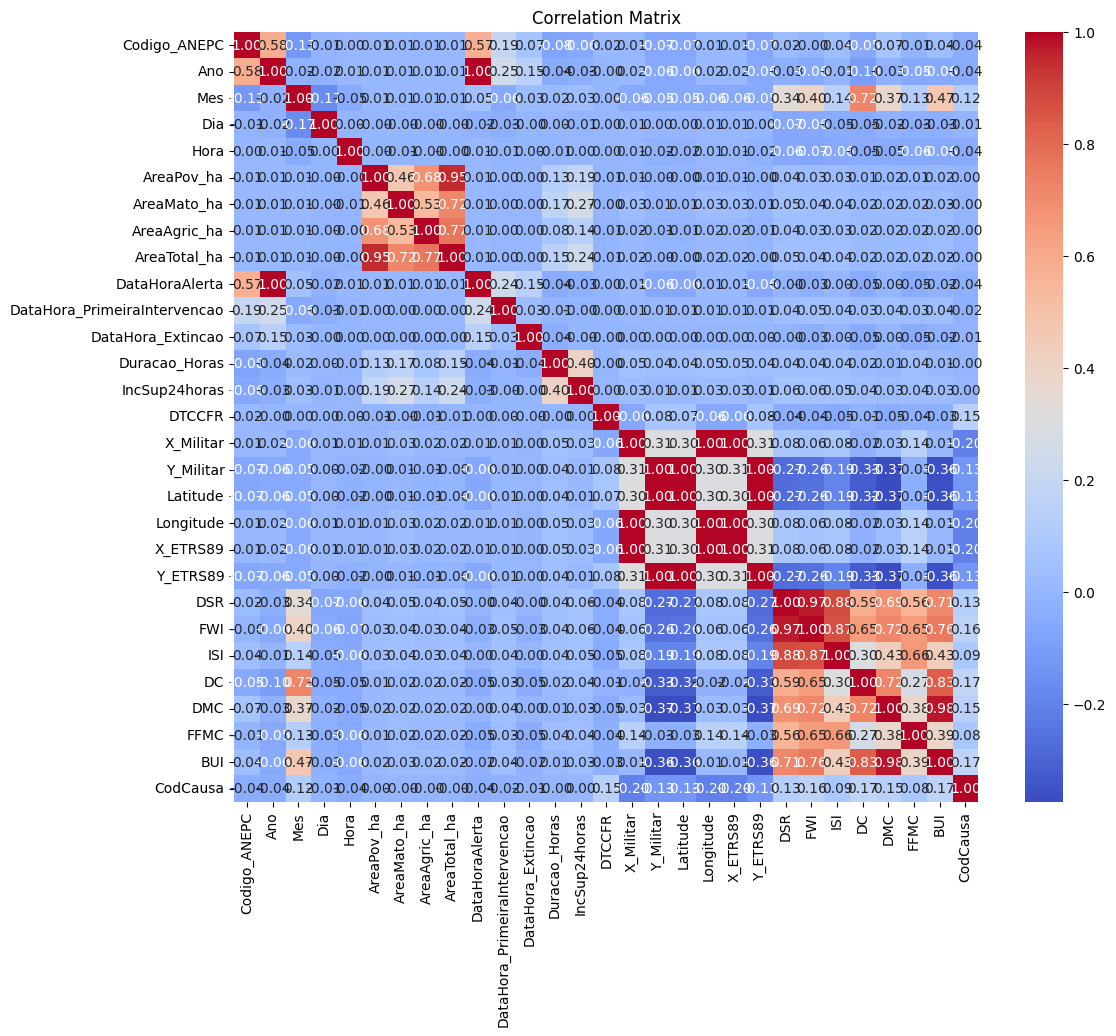

In [3]:
# drop columns with type object
dataset1 = dataset.select_dtypes(exclude=['object'])

# plot a correlation matrix
corr = dataset1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [4]:
dataset.describe()

,Codigo_ANEPC,Ano,Mes,Dia,Hora,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,DataHoraAlerta,...,X_ETRS89,Y_ETRS89,DSR,FWI,ISI,DC,DMC,FFMC,BUI,CodCausa
count,1.771290e+05,177129.000000,177129.000000,177129.000000,177129.000000,177129.000000,177129.000000,177129.000000,177129.000000,177129,...,177129.000000,177129.000000,1.766600e+05,176660.000000,176660.000000,176660.000000,176660.000000,176660.000000,176660.000000,141032.000000
mean,1.676917e+12,2014.636034,7.019110,15.704916,14.192713,3.602378,3.274661,0.502079,7.379118,2015-03-06 20:20:28.482292224,...,-12262.808082,97684.369139,8.021039e+00,22.005461,6.692689,469.364418,86.931668,87.791771,112.888690,367.594326
min,3.680000e+02,2011.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-01-01 17:53:00,...,-128490.214050,-297149.265753,7.651619e-11,0.000015,0.000017,1.043667,0.077379,14.659298,0.140764,2.000000
25%,2.012130e+12,2012.000000,6.000000,8.000000,12.000000,0.000000,0.000000,0.000000,0.010000,2012-07-22 12:53:00,...,-39174.963528,6499.332133,1.875702e+00,10.933373,4.271508,202.762329,30.613368,86.154020,40.943117,124.000000
50%,2.015010e+12,2015.000000,8.000000,16.000000,15.000000,0.000000,0.010000,0.000000,0.050000,2015-03-08 15:29:00,...,-19041.418775,153849.114194,6.469253e+00,22.005641,6.167909,488.316363,73.842839,88.760326,104.634811,448.000000
75%,2.017110e+12,2017.000000,9.000000,23.000000,18.000000,0.000000,0.120000,0.000000,0.500000,2017-07-25 20:15:00,...,14299.115197,188607.152933,1.197015e+01,31.154459,8.567963,690.878014,120.893757,91.153569,162.534062,630.000000
max,2.020180e+12,2020.000000,12.000000,31.000000,23.000000,47215.433221,15647.000000,5493.424200,53618.811555,2020-12-30 17:39:00,...,159990.223266,931244.251247,6.252048e+01,79.273169,30.586951,1622.020945,716.228934,98.439945,713.880449,711.000000
std,7.534868e+11,2.818906,2.406748,8.698950,5.766393,198.693160,89.197687,26.490161,272.536579,NaN,...,47721.194261,129470.325742,7.334698e+00,13.015037,3.527300,295.602388,72.778526,6.021505,83.816653,247.958301


In [5]:
# check for missing values
dataset.isnull().sum()

Codigo_SGIF                          0
Codigo_ANEPC                         0
Ano                                  0
Mes                                  0
Dia                                  0
Hora                                 0
AreaPov_ha                           0
AreaMato_ha                          0
AreaAgric_ha                         0
AreaTotal_ha                         0
ClasseArea                           0
DataHoraAlerta                       0
DataHora_PrimeiraIntervencao       275
DataHora_Extincao                  466
Duracao_Horas                      466
IncSup24horas                        0
DTCCFR                               0
Distrito                             0
Concelho                             0
Freguesia                            0
Local                                0
RNAP                            170858
RNMPF                           171999
X_Militar                            0
Y_Militar                            0
Latitude                 

In [6]:
# drop columns RNAP and RNMPF
dataset = dataset.drop(columns=['RNAP', 'RNMPF', 'X_Militar', 'Y_Militar', 'Latitude', 'Longitude', 'X_ETRS89', 'Y_ETRS89'])
dataset.isnull().sum()

Codigo_SGIF                         0
Codigo_ANEPC                        0
Ano                                 0
Mes                                 0
Dia                                 0
Hora                                0
AreaPov_ha                          0
AreaMato_ha                         0
AreaAgric_ha                        0
AreaTotal_ha                        0
ClasseArea                          0
DataHoraAlerta                      0
DataHora_PrimeiraIntervencao      275
DataHora_Extincao                 466
Duracao_Horas                     466
IncSup24horas                       0
DTCCFR                              0
Distrito                            0
Concelho                            0
Freguesia                           0
Local                               0
DSR                               469
FWI                               469
ISI                               469
DC                                469
DMC                               469
FFMC        

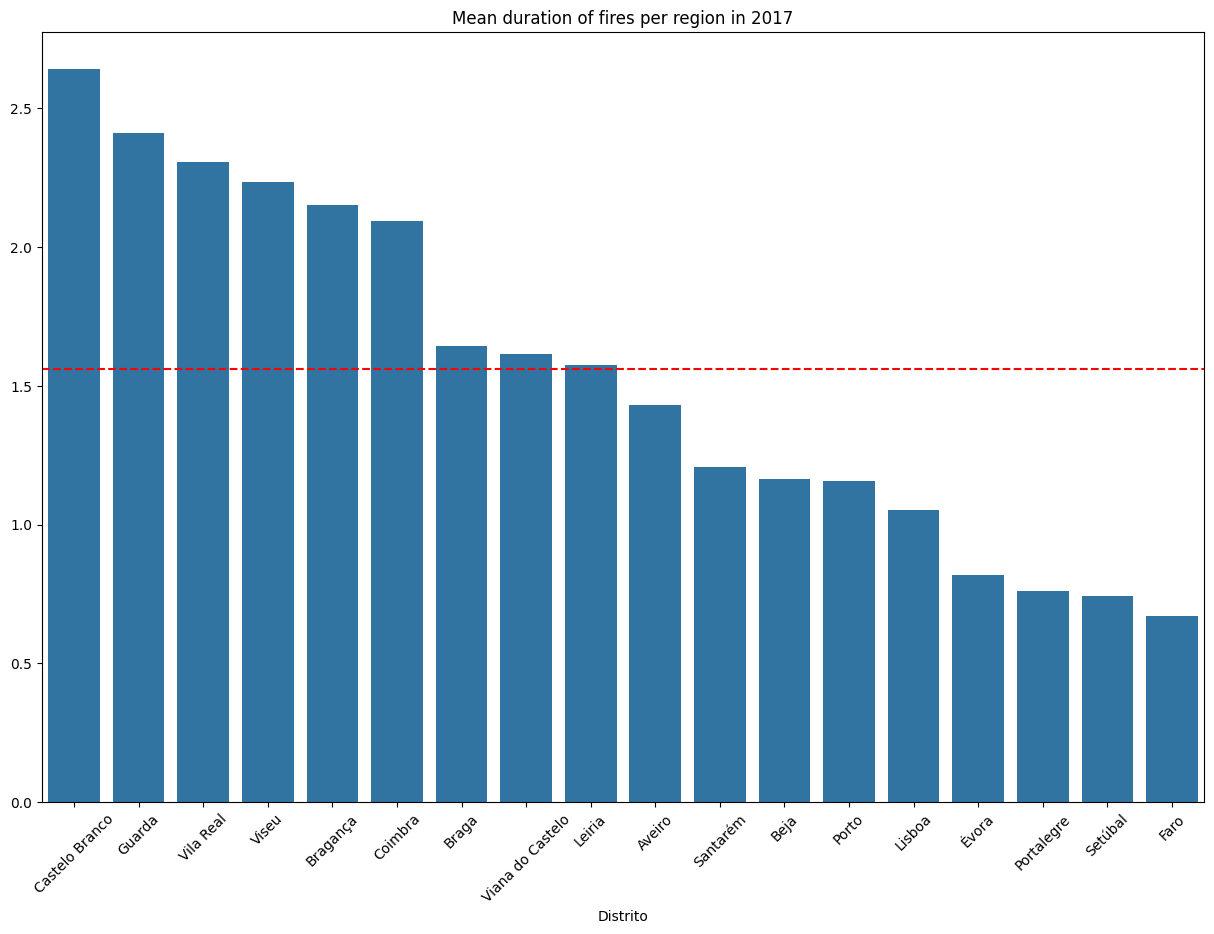

In [7]:
# plot the mean duration of fires per region in the year 2017 and compare it with the mean duration of fires in the 2017
dataset_2017 = dataset[dataset['Ano'] == 2017]
mean_duration_per_region = dataset_2017.groupby('Distrito')['Duracao_Horas'].mean()
mean_duration_per_region = mean_duration_per_region.sort_values(ascending=False)

mean_duration_year_2017 = dataset_2017['Duracao_Horas'].mean()

plt.figure(figsize=(15, 10))
sns.barplot(x=mean_duration_per_region.index, y=mean_duration_per_region.values)
plt.axhline(mean_duration_year_2017, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.title('Mean duration of fires per region in 2017')
plt.show()

In [8]:
# drop rows with missing values
dataset = dataset.dropna()

In [9]:
dataset.columns

Index(['Codigo_SGIF', 'Codigo_ANEPC', 'Ano', 'Mes', 'Dia', 'Hora',
       'AreaPov_ha', 'AreaMato_ha', 'AreaAgric_ha', 'AreaTotal_ha',
       'ClasseArea', 'DataHoraAlerta', 'DataHora_PrimeiraIntervencao',
       'DataHora_Extincao', 'Duracao_Horas', 'IncSup24horas', 'DTCCFR',
       'Distrito', 'Concelho', 'Freguesia', 'Local', 'DSR', 'FWI', 'ISI', 'DC',
       'DMC', 'FFMC', 'BUI', 'CodCausa', 'TipoCausa', 'GrupoCausa',
       'DescricaoCausa', 'FonteAlerta'],
      dtype='object')

In [10]:
# create a new dataset with only the columns we want
dataset = dataset.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10]]